In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model,model_selection
from sklearn import utils
from sklearn import preprocessing
from numpy import nan as NaN

# 1. 读入数据、预处理

In [2]:
df_labled = pd.read_csv('iBeacon_RSSI_Labeled.csv')

In [3]:
df_unlabled = pd.read_csv('iBeacon_RSSI_Unlabeled.csv')

In [4]:
for i in range (2,df_labled.shape[1]):
    for j in range (0,df_labled.shape[0]):
        df_labled.iloc[j,i]+=200.
        df_unlabled.iloc[j,i]/=200.
#df_labled

In [5]:
for i in range (2,df_unlabled.shape[1]):
    for j in range (0,df_unlabled.shape[0]):
        df_unlabled.iloc[j,i]+=200.
        df_unlabled.iloc[j,i]/=200.
df_unlabled

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,0.995000,0.995000,0.998000,0.995000,0.998075,0.998600,0.997975,0.99500,0.995,0.995,0.995,0.995,0.995
1,?,11-7-2016 12:29:00,0.995000,0.995000,0.998000,0.995000,0.998050,0.998600,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
2,?,11-7-2016 12:28:59,0.995000,0.995000,0.997975,0.995000,0.998150,0.998425,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
3,?,11-7-2016 12:28:58,0.995000,0.995000,0.995000,0.995000,0.998125,0.998600,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
4,?,11-7-2016 12:28:57,0.995000,0.995000,0.995000,0.995000,0.997950,0.998600,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
5,?,11-7-2016 12:28:56,0.995000,0.995000,0.995000,0.995000,0.997975,0.998450,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
6,?,11-7-2016 12:28:55,0.995000,0.995000,0.995000,0.995000,0.997975,0.998475,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
7,?,11-7-2016 12:28:54,0.995000,0.995000,0.995000,0.995000,0.997975,0.998550,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
8,?,11-7-2016 12:28:53,0.995000,0.995000,0.995000,0.995000,0.998000,0.998550,0.995000,0.99500,0.995,0.995,0.995,0.995,0.995
9,?,11-7-2016 12:28:52,0.995000,0.995000,0.995000,0.995000,0.998000,0.998525,0.998100,0.99500,0.995,0.995,0.995,0.995,0.995


In [6]:
import time
for j in range (0,df_labled.shape[0]):
    dt=str(df_labled.iloc[j,1])
    #转换成时间数组
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    df_labled.iloc[j,1]=timestamp

#df_labled

In [7]:
import time
for j in range (0,df_unlabled.shape[0]):
    dt=str(df_unlabled.iloc[j,1])
    #转换成时间数组
    timeArray = time.strptime(dt, "%m-%d-%Y %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    df_unlabled.iloc[j,1]=timestamp

#df_unlabled

In [8]:
X_lable=df_labled.iloc[:,1:15]
y_lable=df_labled.iloc[:,0]
X_unlable=df_unlabled.iloc[:,1:15]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lable, y_lable, test_size=0.33, random_state=42)

# 2.  分类：
## 2.1  SVM

In [10]:
from sklearn.svm import SVC
clf_1=SVC(gamma='auto',C=3)
clf_1.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf_1.score(X_test,y_test)

0.19189765458422176

## 2.2  决策树

In [12]:
from sklearn import tree
clf_2 = tree.DecisionTreeClassifier()
clf_2 = clf_2.fit(X_train,y_train)

In [13]:
clf_2.score(X_test,y_test) 

0.3880597014925373

## 2.3  随机森林

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\Users\LEN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
clf_3 = RandomForestClassifier(n_estimators=80, max_depth=15,random_state=0)
clf_3.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
clf_3.score(X_test,y_test)

0.4093816631130064

# 3  聚类
## 3.1  DBScan

In [17]:
from sklearn.cluster import DBSCAN

DBScan_cato = DBSCAN( min_samples=4, eps=8.0).fit_predict(X_unlable)

In [18]:
DBScan_cato

array([ 0,  0,  0, ..., 52, 52, 52], dtype=int64)

In [19]:
#降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
tsne_embedded=tsne.fit_transform(X_unlable)
tsne_embedded

array([[-13.82534  ,  15.414803 , -12.815594 ],
       [-13.445679 ,  15.706949 , -13.212961 ],
       [-13.451859 ,  15.714467 , -13.199705 ],
       ...,
       [-25.795805 , -15.560041 ,   2.1343856],
       [-25.795805 , -15.560041 ,   2.1343856],
       [-25.795805 , -15.560041 ,   2.1343853]], dtype=float32)

In [20]:
from mpl_toolkits.mplot3d import Axes3D
x, y, z = tsne_embedded[:,0], tsne_embedded[:,1], tsne_embedded[:,2]
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=DBScan_cato)

In [21]:
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')

Text(0.5,0,'X')

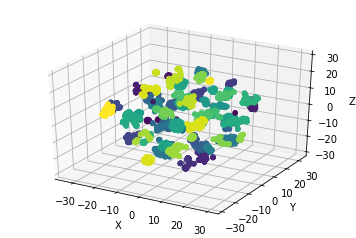

In [22]:
plt.show()

## 3.2  K-Means

https://www.cnblogs.com/pinard/p/6164214.html

In [23]:
from sklearn.cluster import KMeans

### 3.2.1  “手肘法”确定最佳k值
让k从1开始取值直到取到你认为合适的上限(一般来说这个上限不会太大，这里我们选取上限为8)，对每一个k值进行聚类并且记下对于的SSE，然后画出k和SSE的关系图（毫无疑问是手肘形），最后选取肘部对应的k作为我们的最佳聚类数。

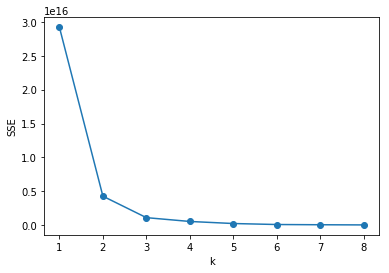

In [24]:
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k,init='k-means++')  # 构造聚类器
    estimator.fit(X_unlable)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

### 3.2.2  轮廓系数法确定最佳k值
该方法的核心指标是轮廓系数（Silhouette Coefficient），某个样本点Xi的轮廓系数定义如下：                                               
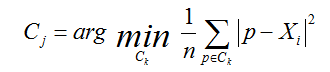
其中，a是Xi与同簇的其他样本的平均距离，称为凝聚度，b是Xi与最近簇中所有样本的平均距离，称为分离度。而最近簇的定义是
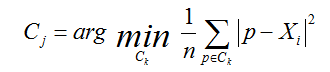
其中p是某个簇Ck中的样本。事实上，简单点讲，就是用Xi到某个簇所有样本平均距离作为衡量该点到该簇的距离后，选择离Xi最近的一个簇作为最近簇。
    求出所有样本的轮廓系数后再求平均值就得到了平均轮廓系数。平均轮廓系数的取值范围为[-1,1]，且簇内样本的距离越近，簇间样本距离越远，平均轮廓系数越大，聚类效果越好。那么，很自然地，平均轮廓系数最大的k便是最佳聚类数。

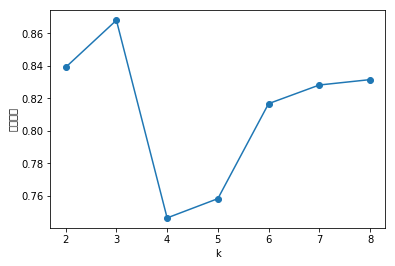

In [25]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,9):
    estimator = KMeans(n_clusters=k,init='k-means++')  # 构造聚类器
    estimator.fit(X_unlable)
    Scores.append(silhouette_score(X_unlable,estimator.labels_,metric='euclidean'))
X = range(2,9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()

### 3.2.3  综上两法选取k值
可以看到，轮廓系数最大的k值是3，这表示我们的最佳聚类数为3。但是，值得注意的是，在k和SSE的手肘图中，也可能k取3时，SSE还非常大，这是k就是一个不太合理的聚类数，我们退而求其次，可以考虑轮廓系数第二大的k值k'，这时候SSE已经处于一个较低的水平，因此最佳聚类系数应该取k'而不是k。

但是，讲道理，k时轮廓系数最大，聚类效果应该非常好，那为什么SSE会这么大呢？在我看来，原因在于轮廓系数考虑了分离度b，也就是样本与最近簇中所有样本的平均距离。为什么这么说，因为从定义上看，轮廓系数大，不一定是凝聚度a（样本与同簇的其他样本的平均距离）小，而可能是b和a都很大的情况下b相对a大得多，这么一来，a是有可能取得比较大的。a一大，样本与同簇的其他样本的平均距离就大，簇的紧凑程度就弱，那么簇内样本离质心的距离也大，从而导致SSE较大。所以，虽然轮廓系数引入了分离度b而限制了聚类划分的程度，但是同样会引来最优结果的SSE比较大的问题，这一点也是值得注意的。


In [26]:
kmeans_cato = KMeans(n_clusters=3,init='k-means++',random_state=0).fit_predict(X_unlable)

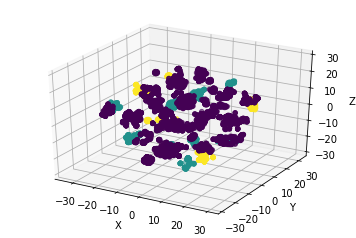

In [27]:
ax_2 = plt.subplot(111, projection='3d')
ax_2.scatter(x,y,z,c=kmeans_cato)
ax_2.set_zlabel('Z')  # 坐标轴
ax_2.set_ylabel('Y')
ax_2.set_xlabel('X')
plt.show()

## 3.3 GMM（高斯混合模型）

In [28]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=10)
gmm.fit(X_unlable)
gmm_cato=gmm.predict(X_unlable)

In [33]:
print(gmm_cato)

[2 2 2 ... 4 4 4]


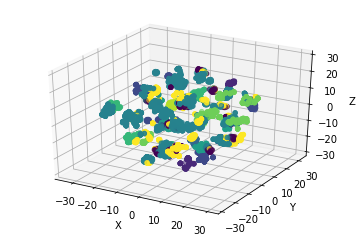

In [30]:
ax_3 = plt.subplot(111, projection='3d')
ax_3.scatter(x,y,z,c=gmm_cato)
ax_3.set_zlabel('Z')  # 坐标轴
ax_3.set_ylabel('Y')
ax_3.set_xlabel('X')
plt.show()

## 3.4  层次聚类
基于层次划分的最佳聚类数确定方法：http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.522.5834&rep=rep1&type=pdf
不是很看得懂。。。所以沿用了k-means聚类中最优k值3。

In [31]:
from sklearn.cluster import AgglomerativeClustering
agnes_cato= AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete").fit_predict(X_unlable)




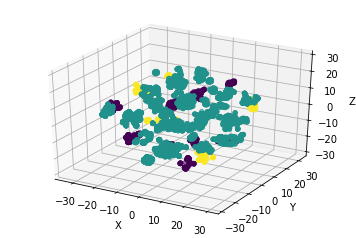

In [32]:
ax_4 = plt.subplot(111, projection='3d')
ax_4.scatter(x,y,z,c=agnes_cato)
ax_4.set_zlabel('Z')  # 坐标轴
ax_4.set_ylabel('Y')
ax_4.set_xlabel('X')
plt.show()